<a href="https://colab.research.google.com/github/yoonju977/Digital-Image-Processing/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from google.colab import drive
drive.mount('/content/drive')
imgpath = '/content/drive/MyDrive/HUFS/24-2의료영상처리학/DIP1/DIP4E'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install nibabel

In [5]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd
import scipy.signal as signal


## Load Nifti file

In [6]:
h = nib.load(imgpath+'/s02.nii')

In [7]:
print(h)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 256, 32)
affine:
[[-9.96521771e-01  1.46108055e-02  1.64083198e-01  1.21900002e+02]
 [-7.60307815e-03  9.64462340e-01 -5.28219402e-01 -1.36844879e+02]
 [ 8.29852745e-02  2.63816088e-01  1.92198420e+00 -9.45585098e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 256 256  32   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [-1.         1.         1.         1.9999906  1.         1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
ca

In [8]:
mri = h.get_fdata()
print(mri.shape)

(256, 256, 32)


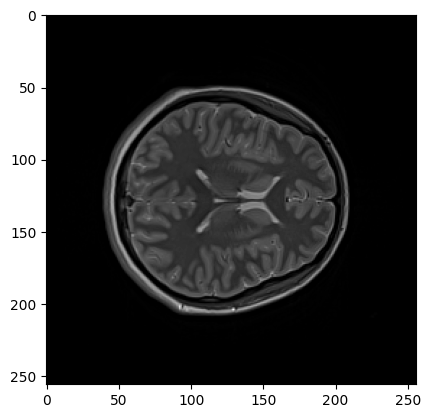

In [9]:
plt.imshow(mri[:,:,20],cmap='gray')
plt.show()

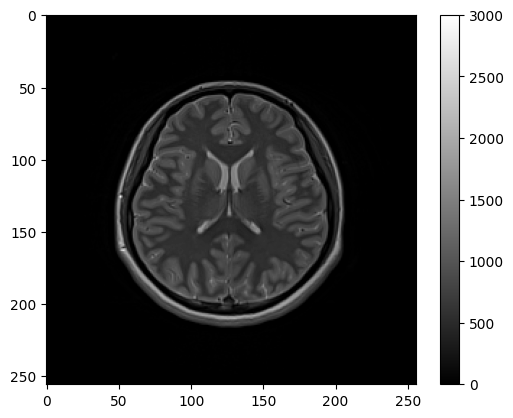

In [10]:
img = mri[::-1,::-1,20].transpose((1,0))
plt.imshow(img,cmap='gray')
plt.colorbar()
plt.show()

## Edge detection - Kirsch Compass Kernels

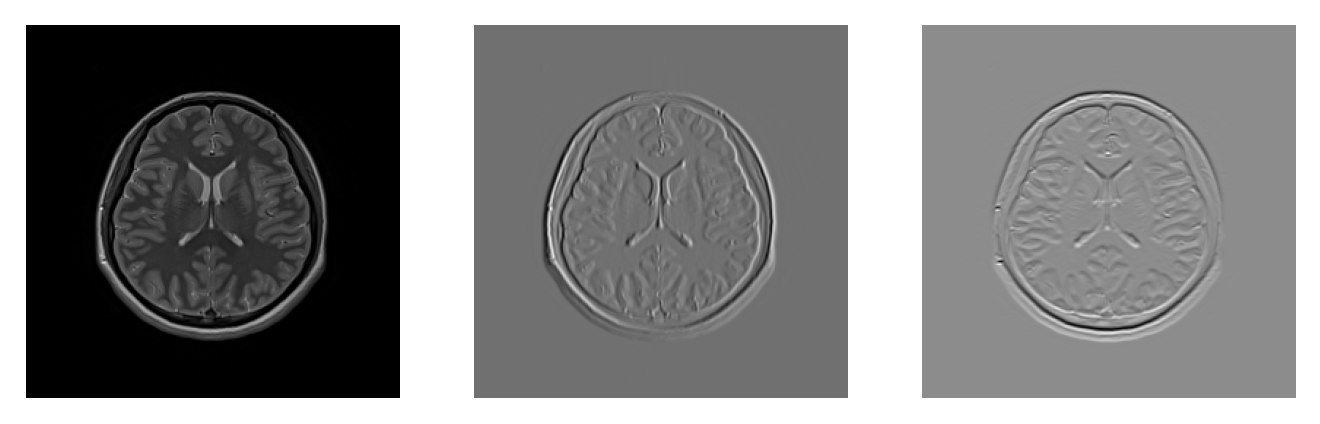

In [11]:
n = np.array([[-3,-3,5],[-3,0,5],[-3,-3,5]])
nw = np.array([[-3,5,5],[-3,0,5],[-3,-3,-3]])
w = np.array([[5,5,5],[-3,0,-3],[-3,-3,-3]])
sw = np.array([[5,5,-3],[5,0,-3],[-3,-3,-3]])
s = np.array([[5,-3,-3],[5,0,-3],[5,-3,-3]])
se = np.array([[-3,-3,-3],[5,0,-3],[5,5,-3]])
e = np.array([[-3,-3,-3],[-3,0,-3],[5,5,5]])
ne = np.array([[-3,-3,-3],[-3,0,5],[-3,5,5]])

plt.figure(dpi=256)
plt.subplot(131)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.subplot(132)
g = signal.convolve2d(img,n,mode='same')
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.subplot(133)
g = signal.convolve2d(img,e,mode='same')
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

## Thresholding

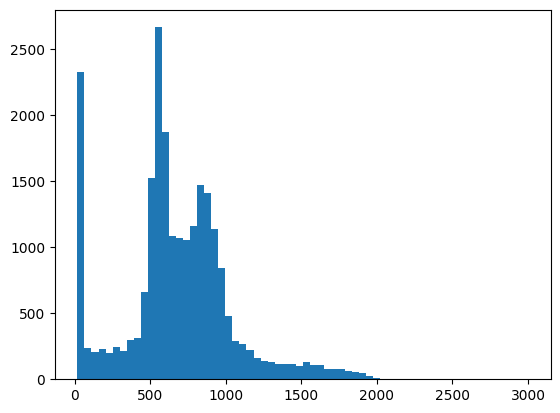

In [12]:
th = 16
plt.hist(img[img>th].ravel(),64)
plt.show()

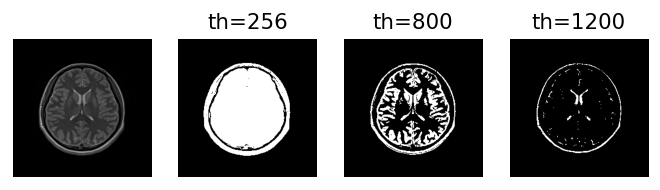

In [13]:
th_vals = [256,800,1200]
plt.figure(dpi=128)
plt.subplot(1,4,1)
plt.imshow(img,cmap='gray')
plt.axis('off')
for n in range(3):
  plt.subplot(1,4,n+2)
  bmsk = img>th_vals[n]
  plt.imshow(bmsk,cmap='gray')
  plt.axis('off')
  plt.title(f'th={th_vals[n]}')
plt.show()

## Noisy image

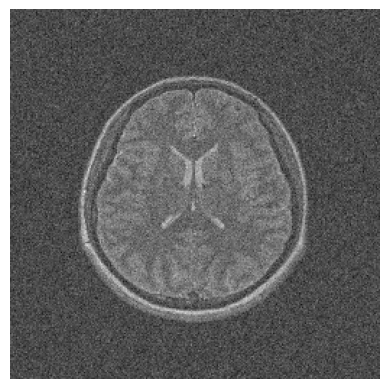

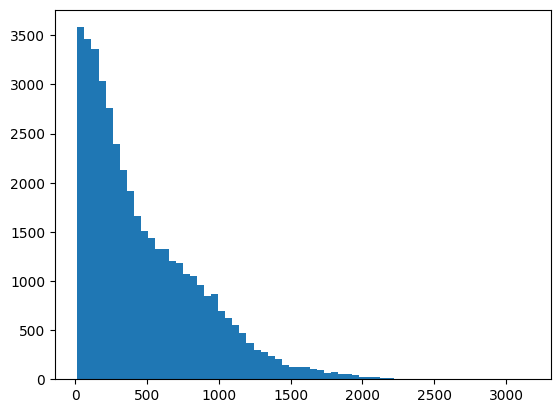

In [14]:
img_n = img + 256*np.random.randn(img.shape[0],img.shape[1])
th = 16

plt.imshow(img_n,cmap='gray')
plt.axis('off')
plt.show()

plt.hist(img_n[img_n>th].ravel(),64)
plt.show()


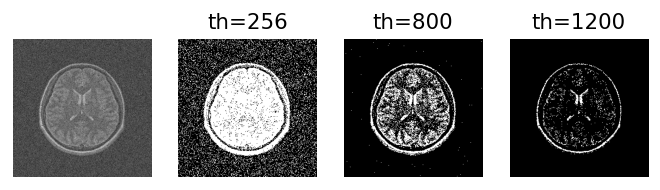

In [15]:
th_vals = [256,800,1200]
plt.figure(dpi=128)
plt.subplot(1,4,1)
plt.imshow(img_n,cmap='gray')
plt.axis('off')
for n in range(3):
  plt.subplot(1,4,n+2)
  bmsk = img_n>th_vals[n]
  plt.imshow(bmsk,cmap='gray')
  plt.axis('off')
  plt.title(f'th={th_vals[n]}')
plt.show()

## Exercise 1: Kirsch Compass Kernels
- 눈이 보이는 슬라이스를 찾아 8개의 Kirsch Compass Kernel을 적용한 결과를 각각 display해보자.

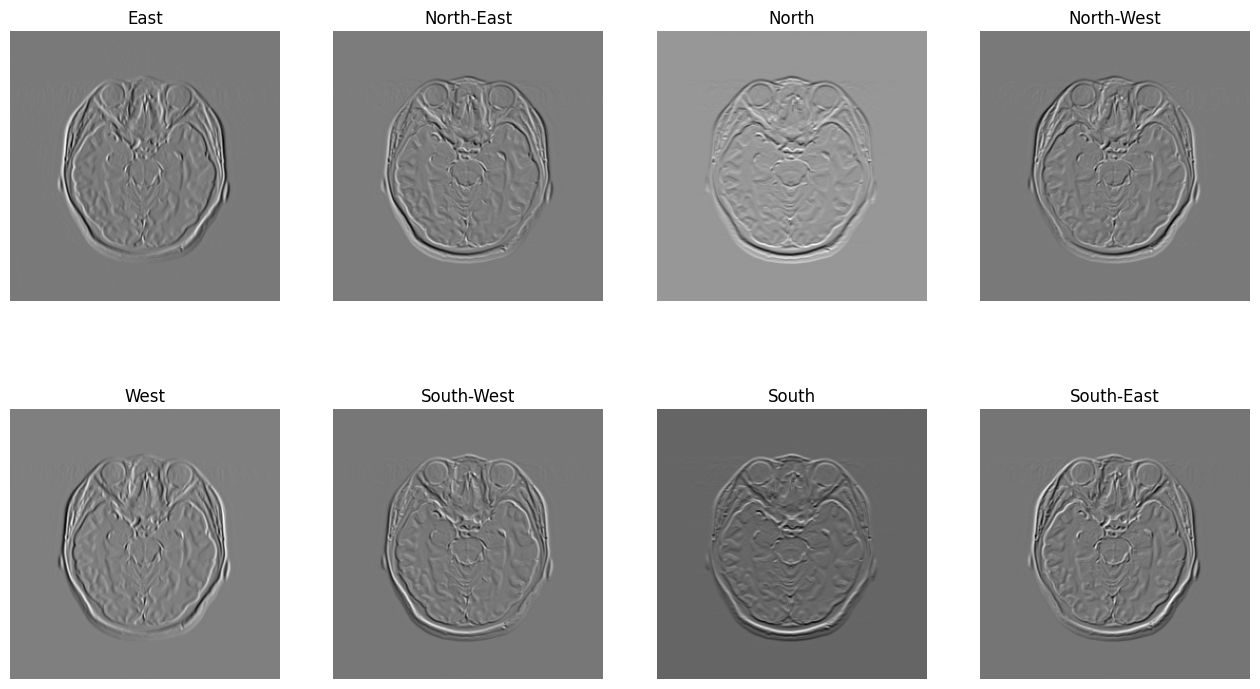

In [18]:
ks = np.zeros((8, 3, 3))
ks[0] = np.array([[-3, -3, 5], [-3, 0, 5], [-3, -3, 5]])  # East
ks[1] = np.array([[-3, 5, 5], [-3, 0, 5], [-3, -3, -3]])  # North-East
ks[2] = np.array([[5, 5, 5], [-3, 0, -3], [-3, -3, -3]])  # North
ks[3] = np.array([[5, 5, -3], [5, 0, -3], [-3, -3, -3]])  # North-West
ks[4] = np.array([[5, -3, -3], [5, 0, -3], [5, -3, -3]])  # West
ks[5] = np.array([[-3, -3, -3], [5, 0, -3], [5, 5, -3]])  # South-West
ks[6] = np.array([[-3, -3, -3], [-3, 0, -3], [5, 5, 5]])  # South
ks[7] = np.array([[-3, -3, -3], [-3, 0, 5], [-3, 5, 5]])  # South-East


compass_directions = ['East', 'North-East', 'North', 'North-West',
                      'West', 'South-West', 'South', 'South-East']


img = mri[::-1, ::-1, 4].transpose((1, 0))


plt.figure(figsize=(16, 9))
for n in range(8):

    kernel = ks[n]
    padded_img = np.pad(img, 1, mode='constant')
    result = (
        kernel[0, 0] * padded_img[:-2, :-2] +
        kernel[0, 1] * padded_img[:-2, 1:-1] +
        kernel[0, 2] * padded_img[:-2, 2:] +
        kernel[1, 0] * padded_img[1:-1, :-2] +
        kernel[1, 1] * padded_img[1:-1, 1:-1] +
        kernel[1, 2] * padded_img[1:-1, 2:] +
        kernel[2, 0] * padded_img[2:, :-2] +
        kernel[2, 1] * padded_img[2:, 1:-1] +
        kernel[2, 2] * padded_img[2:, 2:]
    )

    plt.subplot(2, 4, n + 1)
    plt.imshow(result, cmap='gray')
    plt.title(compass_directions[n])
    plt.axis('off')

plt.show()


## Exercise 2: Automatic Basic Global Thresholding
- 강의노트의 내용을 기반으로 하여 자동으로 global thresholding을 수행하는 영상처리코드를 작성해보자.

In [20]:
# 임의의 밝기 기준 (예: 200)
threshold_value = 200

# 고휘도 픽셀 비율 계산
bright_ratios = []
for idx in range(mri.shape[2]):  # 모든 슬라이스에 대해 반복
    slice_img = mri[:, :, idx]
    bright_ratio = np.sum(slice_img > threshold_value) / slice_img.size
    bright_ratios.append(bright_ratio)

# 고휘도 픽셀 비율이 가장 높은 슬라이스 찾기
best_slice_idx = np.argmax(bright_ratios)
print(f"뇌척수액이 가장 많이 보이는 슬라이스: {best_slice_idx}")

뇌척수액이 가장 많이 보이는 슬라이스: 9


Iteration | Threshold Value
---------------------------
1         | 155.92
2         | 412.20
3         | 441.40
4         | 445.53


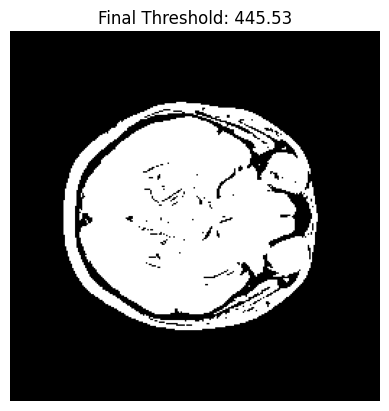

In [22]:
#9번슬라이스 선택(뇌 척수액이 가장 많이 보여서)
img = mri[:, :, 8]

T_init = 1
T = []
T.append(T_init)
dT = 1000
esp = 5

# Thresholding
print("Iteration | Threshold Value")
print("---------------------------")
iteration = 1
while dT > esp:
    # 현재 임계값을 기준으로 이미지 분할
    bmsk = img > T[-1]


    mean_fg = img[bmsk].mean() if img[bmsk].size > 0 else 0  # 전경
    mean_bg = img[~bmsk].mean() if img[~bmsk].size > 0 else 0  # 배경

    # 새로운 임계값 계산
    T_new = (mean_fg + mean_bg) / 2
    T.append(T_new)

    # 변화량
    dT = abs(T[-1] - T[-2])

    # 중간 결과
    print(f"{iteration:<9} | {T_new:.2f}")
    iteration += 1

#최종 결과
bmsk = img > T[-1]
plt.imshow(bmsk, cmap='gray')
plt.axis('off')
plt.title(f'Final Threshold: {T[-1]:.2f}')
plt.show()